<a href="https://colab.research.google.com/github/Noahkandie/Stroke-Prediction-Factor-analysis/blob/main/Stroke_prediction_Noah_Kandie_work_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction Dataset
Defining the Question
Specifying the Data Analytic Question
The research problem is to figure out how we can predict which individuals are most likely to suffer a stroke.

Dataset was retreived from KAGGLE: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


## Data description
1.  id: unique identifier   
2.  gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not



## Defining the Metric for Success
-Providing insights into some of the key demographic factors that might drive individuals’ chances of suffering a stroke.

## Experimental design taken
In this study, we will be conducting Explorative Data Analysis,  to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to suffer a stroke.
In the Multivariate Analysis, we will use Factor Analysis as a Reduction Method in analysing the Data

We seek to answer the following:
 
    What is the gender bias in the patient records?
    What age group of people is more likely to suffer a stroke?
    Which factors are key in an individual suffering a stroke?
## Data Relevance
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

## Read and Check data

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#  Check the summary of the data

print(df.shape)
df.info()

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are data has float, object and interger columns. The bmi column seems to have a few null values.

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# We shall check the percentages of missing columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
id,id,0.000000
gender,gender,0.000000
age,age,0.000000
hypertension,hypertension,0.000000
heart_disease,heart_disease,0.000000
ever_married,ever_married,0.000000
work_type,work_type,0.000000
Residence_type,Residence_type,0.000000
avg_glucose_level,avg_glucose_level,0.000000
bmi,bmi,3.933464


Since the bmi has missing values of ~ 4%, we shall remove them





In [ ]:
# Drop duplicates
df = df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

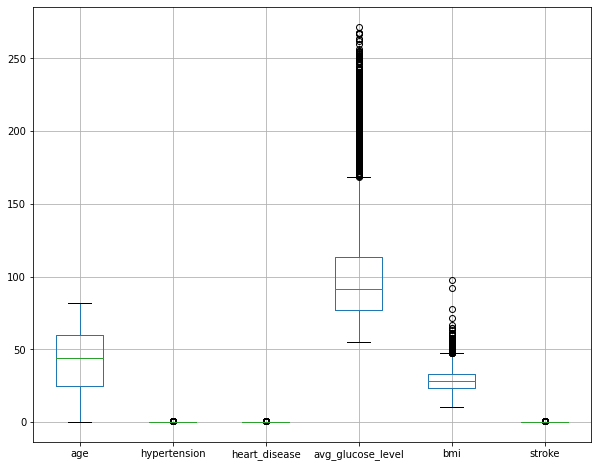

In [ ]:
df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']].boxplot(figsize=(10,8))

# We take note of the outliers in the data. The average glucose level and bmi
# are suspect outlier because its data could be significant       

However since they are actual values of bmi index and glucose levels in the health systems, we shall not remove them

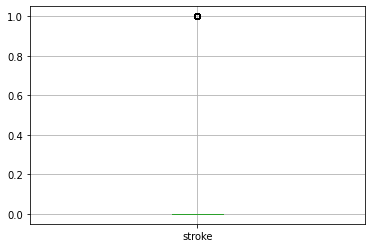

In [ ]:
df[['stroke']].boxplot()
# The stroke boxplot shows that it is just the labels; 0 and 1

In [ ]:
# Drop the unneeded columns
df.drop(columns='id',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
# Change the data types to categorical data
cols = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']
df[cols] = df[cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4909 non-null   category
 1   age                4909 non-null   float64 
 2   hypertension       4909 non-null   int64   
 3   heart_disease      4909 non-null   int64   
 4   ever_married       4909 non-null   category
 5   work_type          4909 non-null   category
 6   Residence_type     4909 non-null   category
 7   avg_glucose_level  4909 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     4909 non-null   category
 10  stroke             4909 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 293.2 KB


## Exploratory data analysis

### Univariate Analysis

In [ ]:
# Calculate the mean
df.mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age                   42.865374
hypertension           0.091872
heart_disease          0.049501
avg_glucose_level    105.305150
bmi                   28.893237
stroke                 0.042575
dtype: float64

The average bmi index of a subject is 28.89, which is overweight (healthy = 18.5 to 24.9). The average of 105.305md/dL is higher than the expected values for normal fasting blood glucose concentration  which are between 70 mg/dL and 100 mg/dL 

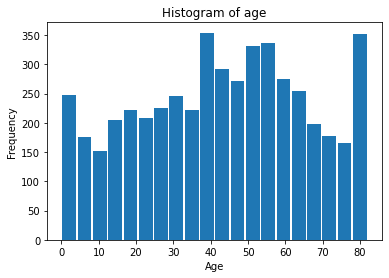

In [ ]:
# Age
# Plot the histogram of age
df['age'].plot(kind='hist',bins=20,rwidth=0.9)
plt.xlabel('Age')
plt.title('Histogram of age')
plt.show()

The highest peak is at those who are = 80 yrs. The data is negatively skewed. the curve rises but declines after 50 years

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.quantile([0.25,0.5,0.75])

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0.25,25.0,0.0,0.0,77.07,23.5,0.0
0.50,44.0,0.0,0.0,91.68,28.1,0.0
0.75,60.0,0.0,0.0,113.57,33.1,0.0


Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


Text(0.5, 1.0, 'Pie Chart of Gender distribution')

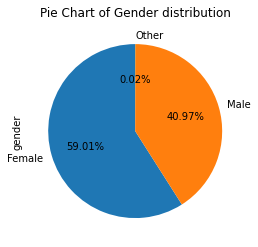

In [ ]:
# Gender
gen=df.gender.value_counts()
print(gen)
gen.plot(kind='pie',startangle=90,autopct='%1.2f%%' )

plt.title('Pie Chart of Gender distribution')

59% of the respondents are female, while there are patients who did not disclose their gender, 0.02%

0    4700
1     209
Name: stroke, dtype: int64


Text(0.5, 0, 'Stroke status')

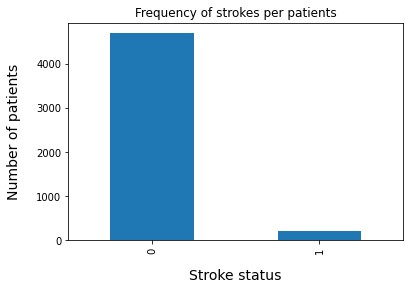

In [ ]:
# Stacked columns

# Country
xx =df['stroke'].value_counts()
print(xx)
xx.plot(kind='bar',stacked=True,title='Frequency of strokes per patients')
plt.ylabel('Number of patients',fontsize=14, labelpad=15)
plt.xlabel('Stroke status',fontsize=14, labelpad=15)

Few people had strokes 209, compared to 4700 patients who did not suffer strokes. Huge class imbalance

stroke           0    1
hypertension           
0             4309  149
1              391   60


Text(0.5, 0, 'Hypertension status')

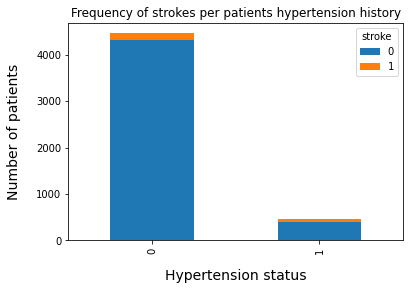

In [ ]:
# Stacked columns

# Country
country1=pd.crosstab(df['hypertension'],df['stroke'])
print(country1)
country1.plot(kind='bar',stacked=True,title='Frequency of strokes per patients hypertension history')
plt.ylabel('Number of patients',fontsize=14, labelpad=15)
plt.xlabel('Hypertension status',fontsize=14, labelpad=15)


The people with hypertension were few and there is a class imbalance

1    3204
0    1705
Name: ever_married, dtype: int64


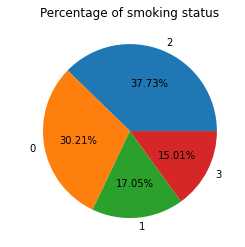

In [ ]:

# The percentage of people per smoking status
print(df['ever_married'].value_counts())
df['smoking_status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of smoking status')
plt.ylabel(' ')
plt.show()

2    1852
0    1483
1     837
3     737
Name: smoking_status, dtype: int64


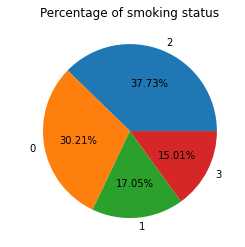

In [ ]:

# The percentage of people per smoking status
print(df['smoking_status'].value_counts())
df['smoking_status'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of smoking status')
plt.ylabel(' ')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [ ]:
#  Make a copy
df_1= df
# Label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_1['gender']=label_encoder.fit_transform(df_1['gender'])


df_1['ever_married']=label_encoder.fit_transform(df_1['ever_married'])


df_1['smoking_status']=label_encoder.fit_transform(df_1['smoking_status'])

df_1['work_type']=label_encoder.fit_transform(df_1['work_type'])

df_1['Residence_type']=label_encoder.fit_transform(df_1['Residence_type'])


In [ ]:
# Install factor analyzer

!pip3 install factor_analyzer==0.2.3

In [ ]:
# We will standadize the features
# df_1 = scale.fit_transform(df_1)


In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_1)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(7327.241361878475, 0.0)

In [ ]:
# Calculate the KMO value
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_1)
calculate_kmo(df_1)
# Value of KMO less than 0.6 is considered inadequate.
# KMO value of 0.732676 means we can proceed as it is adequate

(                        KMO
 gender             0.600615
 age                0.675994
 hypertension       0.779734
 heart_disease      0.671062
 ever_married       0.688050
 work_type          0.800527
 Residence_type     0.525542
 avg_glucose_level  0.789555
 bmi                0.840747
 smoking_status     0.837788
 stroke             0.724188, 0.7326761029888464)

In [ ]:
# We Choosing the Number of Factors
 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 11, rotation='oblimin')

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# We choose the factors that are > 1.
# so we choose 3 factors only

,Original_Eigenvalues
0,2.691576
1,1.323943
2,1.002947
3,0.980837
4,0.925349
5,0.844241
6,0.822202
7,0.804109
8,0.693791
9,0.625316


In [ ]:
# Perform factor analysis by creating factor analysis object

fa = FactorAnalyzer()
fa.analyze(df_1, 3, rotation="varimax")
fa.loadings




,Factor1,Factor2,Factor3
gender,-0.085179,0.119748,-0.094188
age,0.375149,0.625508,0.684926
hypertension,0.166574,0.368427,-0.037188
heart_disease,0.004427,0.363639,0.036897
ever_married,0.472717,0.295206,0.450762
work_type,-0.565323,0.011969,-0.237717
Residence_type,0.005326,-0.006061,0.017997
avg_glucose_level,0.166862,0.430768,-0.138473
bmi,0.538789,0.171604,0.034898
smoking_status,0.436040,0.059768,0.121974


we note that:
* Factor 1 has high factor loadings for [bmi] 53.88%
* Factor 2 has high factor loadings for [age] 62.55%
* Factor 3 has high factor loadings for [age]68.49%

* Other notable factor loadings include ever_married in factors 1 and 3 at 47% and 45% respectively, and smoking status in factor one at 43.60% with average glucose level having 43.08% in Factor 2

In [ ]:
# Getting variance of each factors
# 
fa.get_factor_variance()

# we note that:
# 28.8% cummulative variance explained by the 3 Factors

,Factor1,Factor2,Factor3
SS Loadings,1.227667,1.086341,0.776919
Proportion Var,0.111606,0.098758,0.070629
Cumulative Var,0.111606,0.210364,0.280993


Conclusion

The reduction technique used was Factor Analysis
- The KMO value was 0.732676 which was moderately sufficient to model the data and check the linear relationship.
- 3 factors had Eigen values greater than 1.
The three factors had high factor loading in the following columns


1.   Age
2.   BMI


The cummulative variance of 28.1% explained by the 3 Factors. This means that the 3 factors only explain 0.281 of the data